In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
from tqdm import tqdm

from path_explain.path_explainer_tf import PathExplainerTF
from path_explain import utils
from plot.text import text_plot

In [2]:
utils.set_up_environment(visible_devices='3')

In [3]:
encoder = tfds.features.text.TokenTextEncoder.load_from_file('encoder')

In [4]:
accumulated_inputs = np.load('accumulated_inputs.npy')
accumulated_embeddings = np.load('accumulated_embeddings.npy')

In [5]:
embedding_attributions = np.load('embedding_attributions.npy')
interaction_matrix = np.load('interaction_matrix.npy')

In [6]:
token_attributions = np.sum(embedding_attributions, axis=-1)
token_interactions = np.sum(interaction_matrix, axis=(2, 4))

In [7]:
model = tf.keras.models.load_model('model.h5')

In [8]:
accumulated_predictions = model(accumulated_inputs)[:, 0].numpy()
accumulated_labels = (accumulated_predictions > 0.5).astype(int)

In [13]:
def plot_interactions(token_array,
                      interactions,
                      include_legend=False,
                      vmin=None,
                      vmax=None,
                      **kwargs):
    for i in range(len(token_array)):
        select_interactions = interactions[i]
        select_interactions[i] = 0.0
        text_plot(token_array, select_interactions, include_legend, vmin=vmin, vmax=vmax, fontsize=20)

In [14]:
def plot_all(i):
    token_array = encoder.decode(accumulated_inputs[i]).split(' ')
    text_plot(token_array, token_attributions[i, :len(token_array)], include_legend=True, fontsize=20)

    select_interactions = token_interactions[i, :len(token_array), :len(token_array)]
    indices = np.where(~np.eye(select_interactions.shape[0], dtype=bool))
    bounds = np.max(np.abs(select_interactions[indices]))

    plot_interactions(token_array, select_interactions, vmin=-bounds, vmax=bounds, fontsize=20)

In [ ]:
plot_all(1)

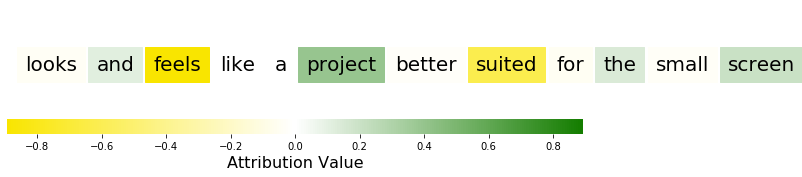

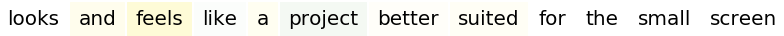

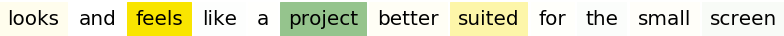

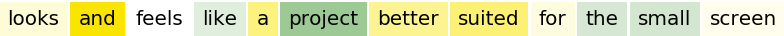

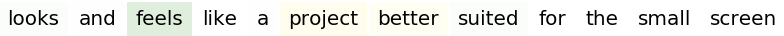

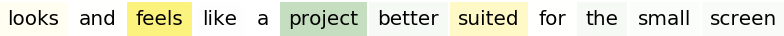

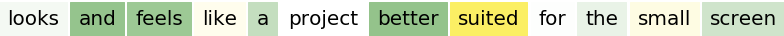

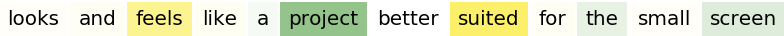

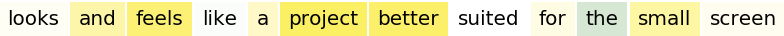

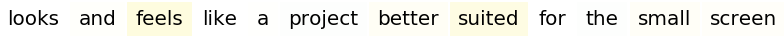

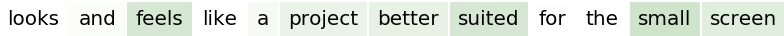

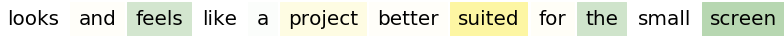

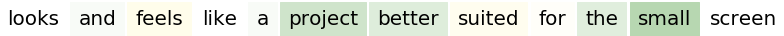

In [72]:
plot_all(3)

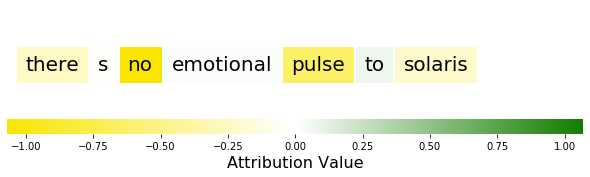

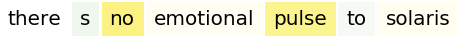

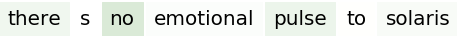

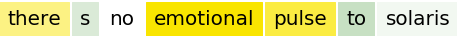

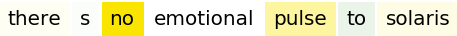

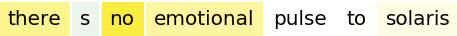

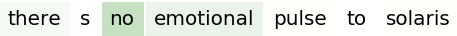

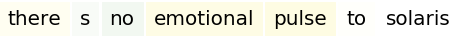

In [83]:
plot_all(12)

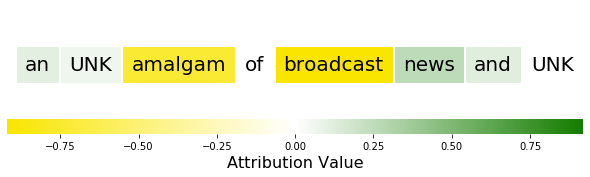

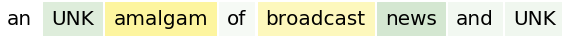

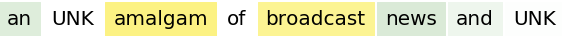

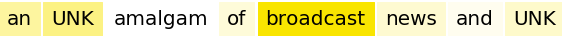

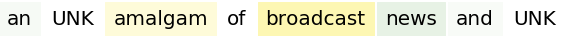

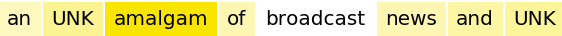

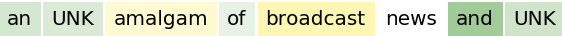

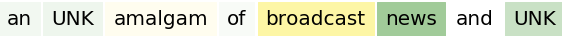

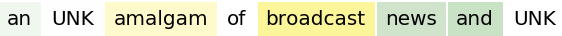

In [90]:
plot_all(14)

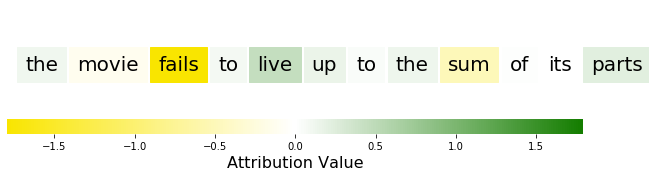

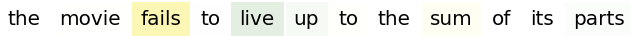

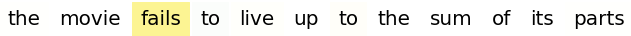

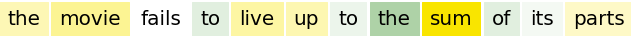

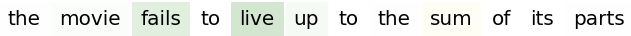

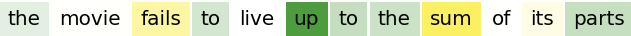

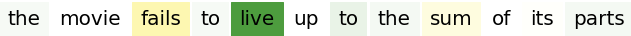

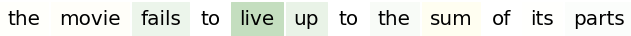

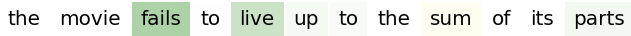

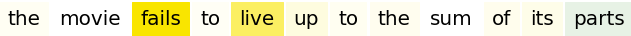

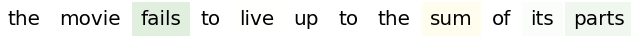

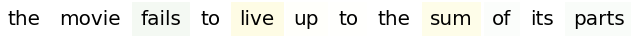

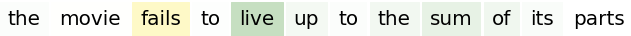

In [94]:
plot_all(16)

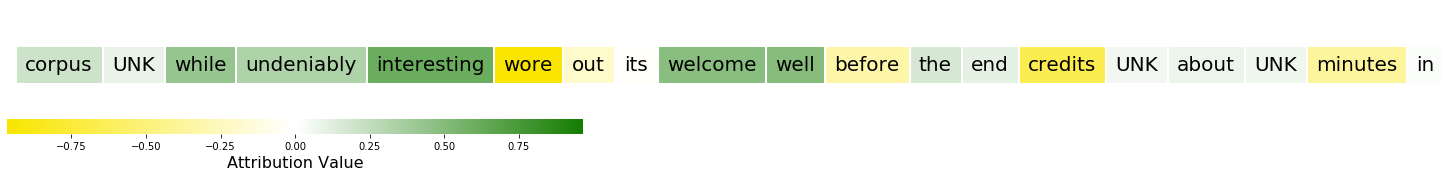

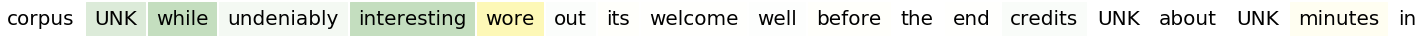

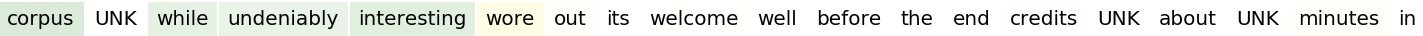

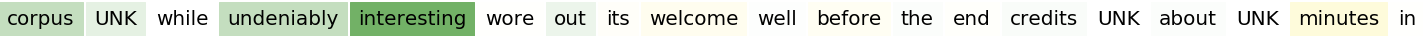

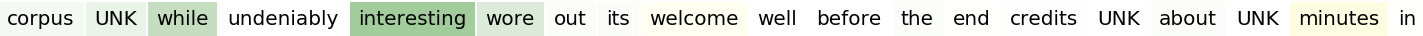

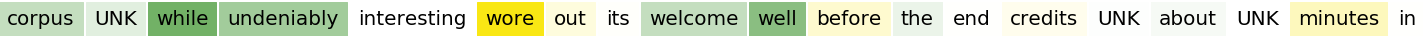

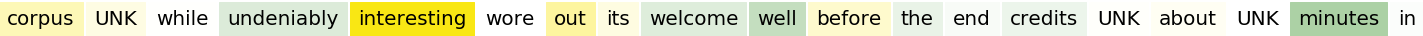

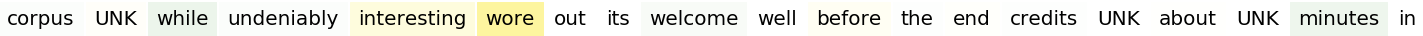

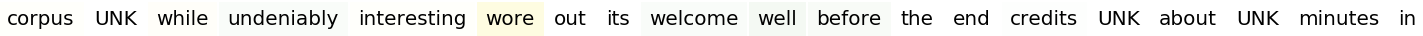

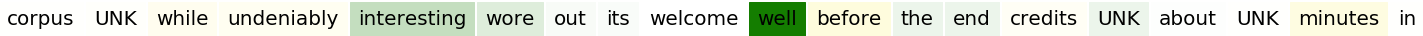

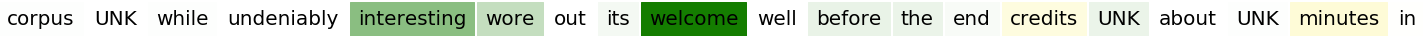

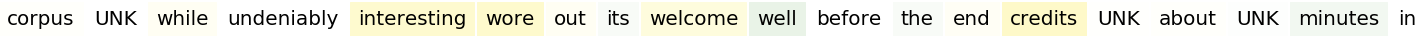

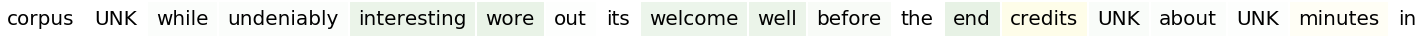

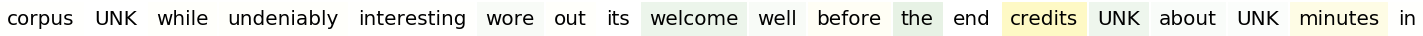

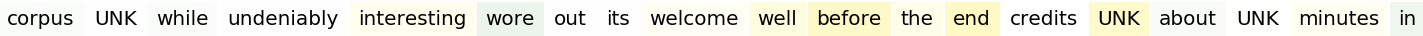

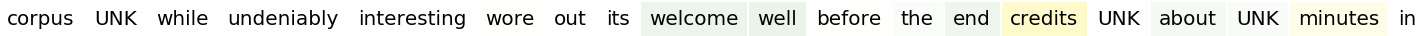

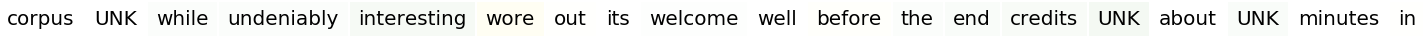

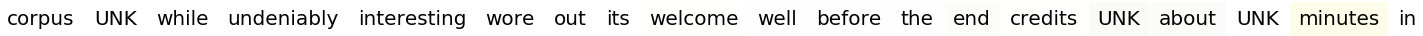

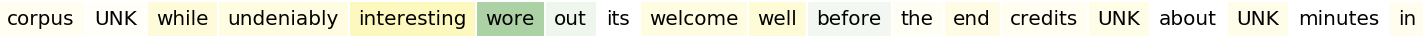

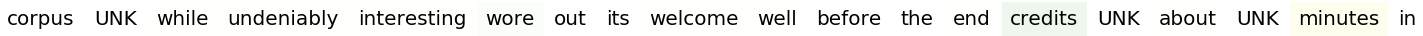

In [95]:
plot_all(17)

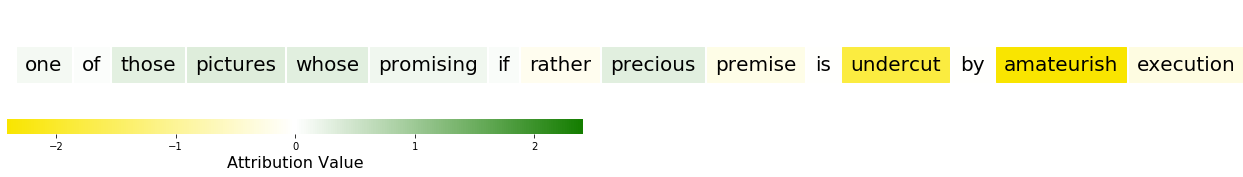

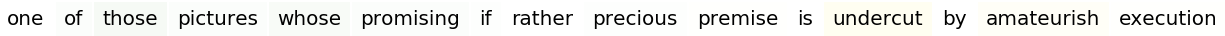

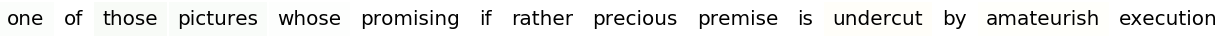

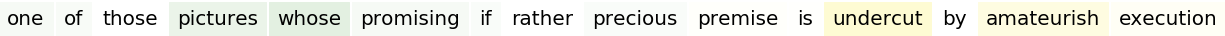

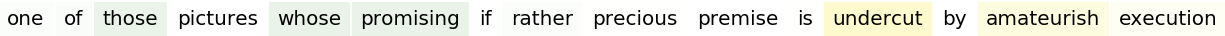

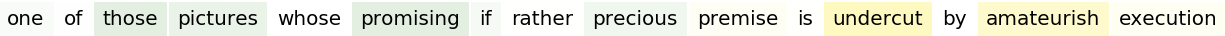

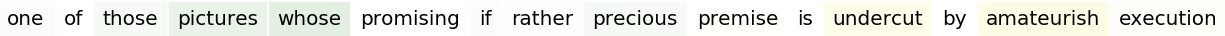

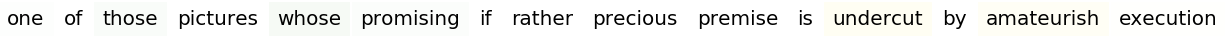

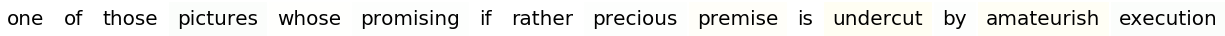

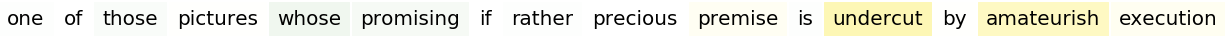

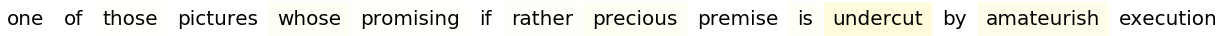

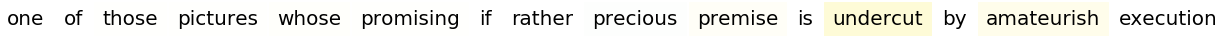

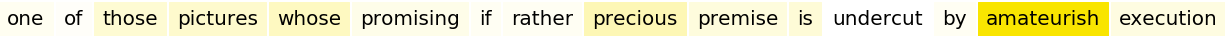

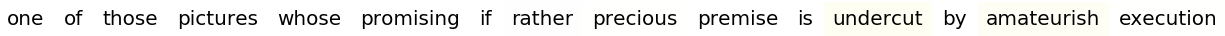

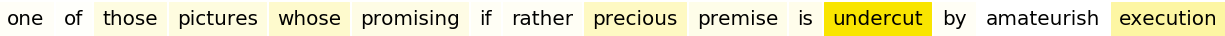

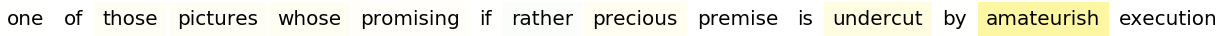

In [100]:
plot_all(18)

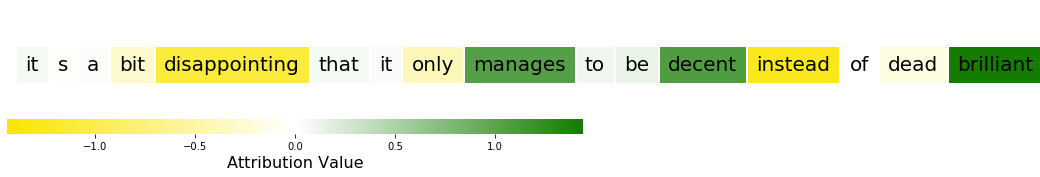

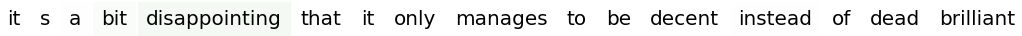

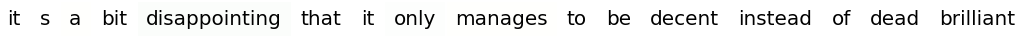

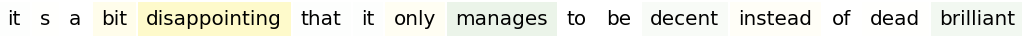

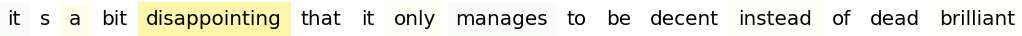

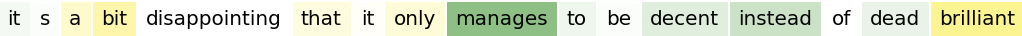

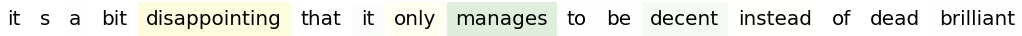

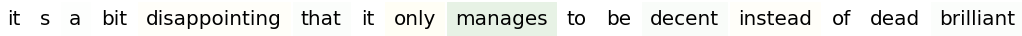

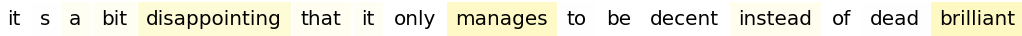

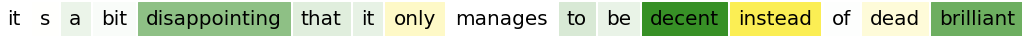

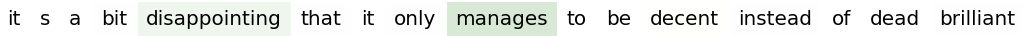

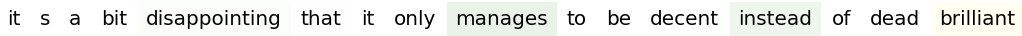

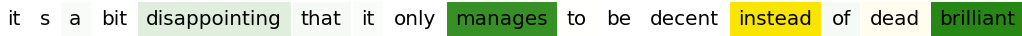

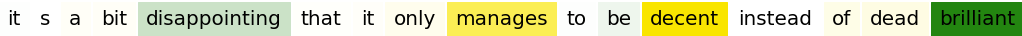

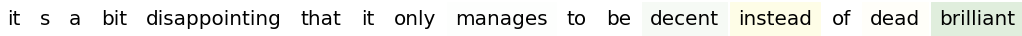

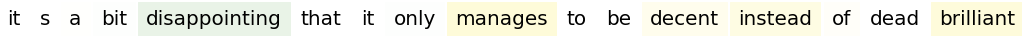

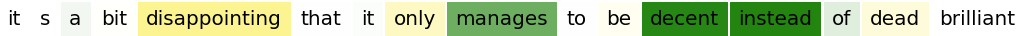

In [106]:
plot_all(20)

0.011542171


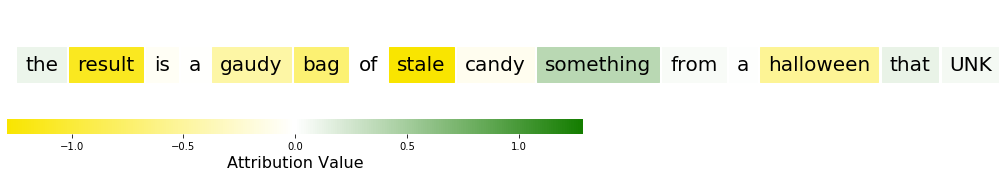

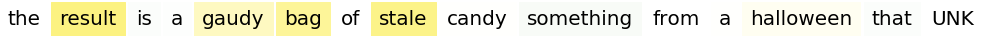

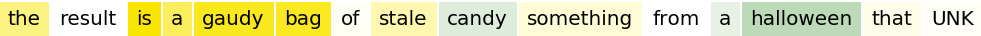

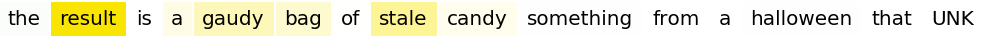

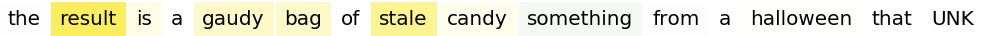

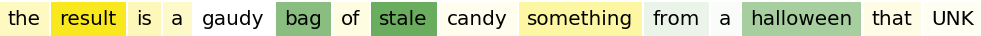

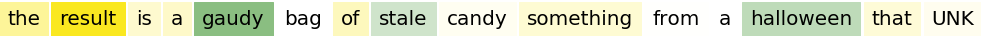

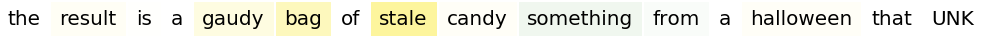

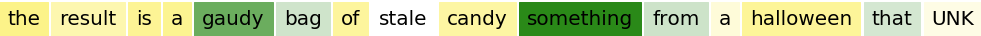

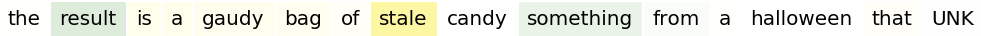

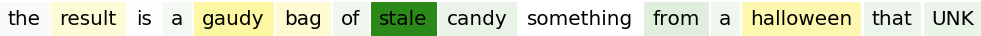

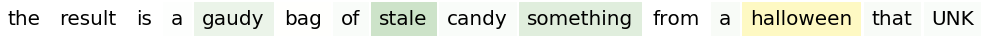

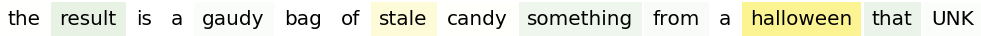

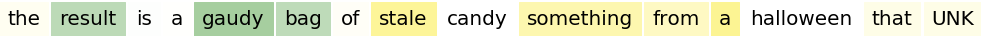

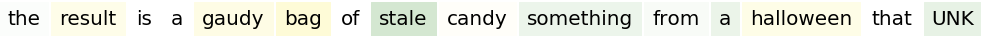

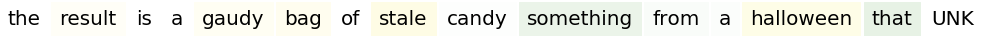

In [118]:
print(accumulated_predictions[27])
plot_all(27)

0.078667015


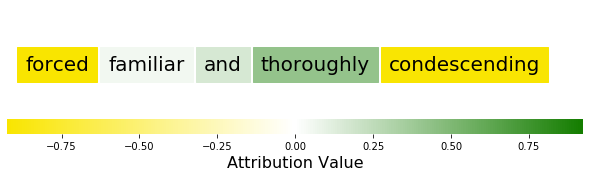

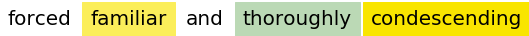

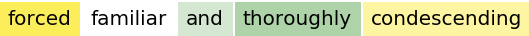

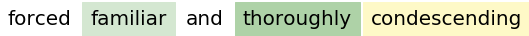

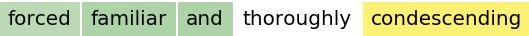

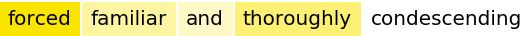

In [120]:
print(accumulated_predictions[29])
plot_all(29)

In [128]:
np.where(accumulated_labels == 1)[0]

array([  1,  19,  20,  22,  30,  32,  45,  49,  56,  57,  59,  61,  64,
        68,  70,  72,  79,  81,  84,  86,  88,  93,  94,  95,  97, 109,
       110, 111, 116, 118])

0.83237565


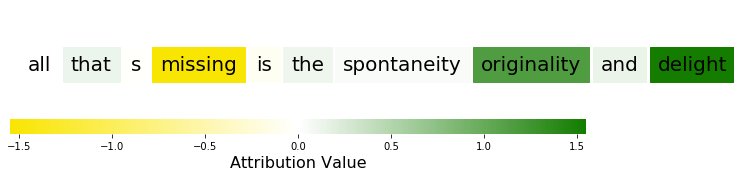

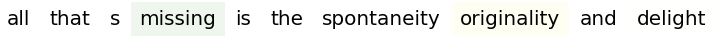

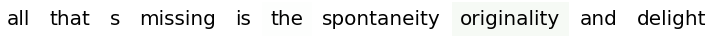

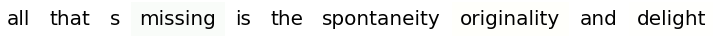

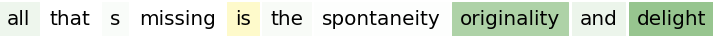

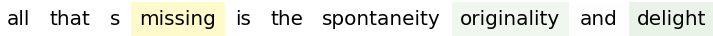

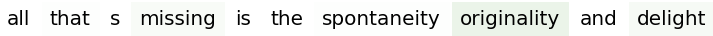

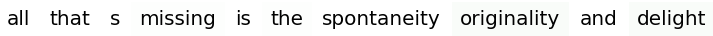

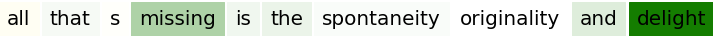

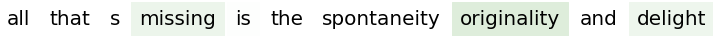

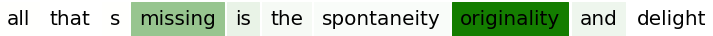

In [136]:
print(accumulated_predictions[68])
plot_all(68)